# Supplementary Figures - Proof-of-concept CROP-seq KO15 screen

In [1]:
# set correct working directory -> project folder
getwd()
setwd('..')
getwd()

[1] "/home/ptraxler/projects/bmdm-stim/workflow/notebooks"

[1] "/home/ptraxler/projects/bmdm-stim"

In [2]:
# source the figure theme, libraries and utility functions
source("./src/figure_theme.R")

In [3]:
library(Seurat, quietly=TRUE)

Attaching SeuratObject

Attaching sp


Attaching package: ‘Seurat’


The following object is masked from ‘package:Hmisc’:

    Key




# configs

In [4]:
# configs
data_path <- file.path('results','KO15')
results_path <- file.path('results','figures','supp_small_screen')

In [5]:
# make directories if not exist
dir.create(results_path, showWarnings = FALSE, recursive = TRUE)

# load & prepare data

In [6]:
# loading Seurat object
KO15 <-readRDS(file = file.path(data_path,paste0("KO15_normalized_Seurat.rds")))
KO15

An object of class Seurat 
45322 features across 9153 samples within 5 assays 
Active assay: SCT (14187 features, 3000 variable features)
 4 other assays present: RNA, AB, gRNA, HTO
 2 dimensional reductions calculated: pca, umap

In [7]:
KO15[['condition']] <- str_split_fixed(KO15$hto_demux, "_", 2)[,2]
unique(KO15$condition)

[1] "LO28_2h"   "untreated" "LO28_6h"

In [8]:
# colors for all perturbations
# KO_col = setNames(object = hue_pal()(length(unique(KO15$KO_call))),nm = unique(KO15$KO_call))
# KO_col["mNon-targeting"] <- "#D3D3D3"
KO_col

mStat1          mIrf8         mKdm1b mNon-targeting         mHdac6 
     "#F8766D"      "#E68613"      "#CD9600"      "#D3D3D3"      "#7CAE00" 
         mIrf9          mTyk2          mcJun         mStat2         mEp300 
     "#0CB702"      "#00BE67"      "#00C19A"      "#00BFC4"      "#00B8E7" 
        mKdm6b         mCsf1r          mRela          mSpi1         mCreb1 
     "#00A9FF"      "#8494FF"      "#C77CFF"      "#ED68ED"      "#FF61CC" 
         mJak1 
     "#FF68A1"

In [9]:
KO15[["cond_KO"]] <- paste(KO15$condition,KO15$KO_call,sep="+")

# Unsupervised Analysis Cite-seq

In [9]:
# load data
AB_UMAP <- read.csv(file=file.path(data_path,'special_analysis/unsupervised_analysis/merged_NORMALIZED_AB/UMAP/','UMAP_correlation_100_0.1_2_data.csv'), row.names=1)
AB_UMAP$condition <- KO15$condition[rownames(AB_UMAP)]
AB_UMAP$KO <- KO15$KO_call[rownames(AB_UMAP)]
dim(AB_UMAP)
head(AB_UMAP)

[1] 9153    4

,UMAP_1,UMAP_2,condition,KO
,<dbl>,<dbl>,<chr>,<chr>
1_AAACCTGAGAAGAAGC-1,5.899037,1.5988120,LO28_2h,mStat1
1_AAACCTGAGACTGTAA-1,8.798775,3.8409730,untreated,mIrf8
1_AAACCTGAGGTGTTAA-1,5.972399,3.7477193,untreated,mKdm1b
1_AAACCTGCAGGCAGTA-1,7.585574,0.9324720,LO28_6h,mNon-targeting
1_AAACCTGCAGTCGTGC-1,7.515870,0.3136183,LO28_6h,mHdac6
1_AAACCTGCATTCTCAT-1,7.894904,2.3466580,LO28_2h,mIrf9


In [10]:
width <- 4
height <- 4
options(repr.plot.width=width, repr.plot.height=height)

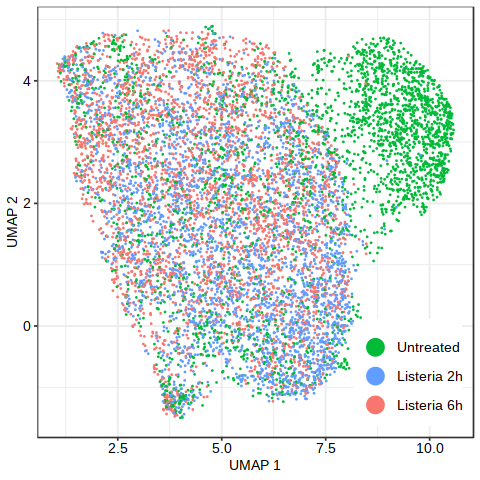

In [24]:
# plot AB UMAP data
metadata <- 'condition'

AB_UMAP_p <- ggplot(AB_UMAP, aes(x=UMAP_1, y=UMAP_2)) +
geom_point(aes_string(color=metadata), size=0.5, shape=19, stroke = 0) +
xlab("UMAP 1") +    
ylab("UMAP 2") +
macro_theme()+
labs(color=NULL) +
scale_color_manual(breaks=names(cond_colors), values=cond_colors, labels=treatment_format(names(cond_colors)), drop=FALSE) +
guides(colour = guide_legend(override.aes = list(size=5))) +
theme(plot.title = element_blank(), legend.position = c(0.85, 0.15), legend.box = "horizontal")

AB_UMAP_p

In [25]:
# save plot
ggsave_new(filename=paste0("UMAP_AB_",metadata),
           results_path=results_path,
           plot=AB_UMAP_p,
           width=width,
           height=height
          )


In [29]:
width <- 5
height <- 4
options(repr.plot.width=width, repr.plot.height=height)

In [37]:
# remove leading 'm' for plot
AB_UMAP$KO <- gsub('^.', '', AB_UMAP$KO)

KO_col_new <- KO_col
names(KO_col_new) <- gsub('^.', '', names(KO_col_new))

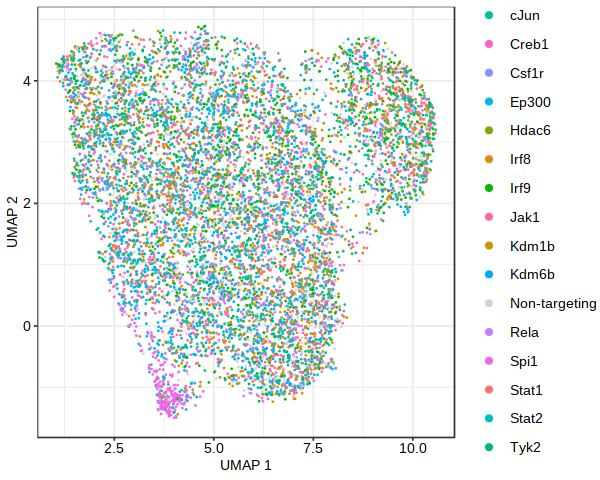

In [39]:
# plot AB UMAP data
metadata <- 'KO'

AB_UMAP_p <- ggplot(AB_UMAP, aes(x=UMAP_1, y=UMAP_2)) +
geom_point(aes_string(color=metadata), size=0.5, shape=19, stroke = 0) +
xlab("UMAP 1") +    
ylab("UMAP 2") +
macro_theme()+
scale_color_manual(values=KO_col_new, drop=FALSE) +
guides(colour = guide_legend(override.aes = list(size=2))) +
theme(plot.title = element_blank())

AB_UMAP_p

In [40]:
# save plot
ggsave_new(filename=paste0("UMAP_AB_",metadata),
           results_path=results_path,
           plot=AB_UMAP_p,
           width=width,
           height=height
          )


# Compare Listeria treatment effect from scRNA-seq to bulk RNA-seq using enrichment results from DEA

In [10]:
# configs
dbs <- c("BioPlanet_2019",
#          "KEGG_2019_Mouse",
         "GO_Biological_Process_2021")

top_n <- 25

KO_gene <- 'mNon-targeting'

[1] 32


Warning message:
“Removed 12 rows containing missing values (geom_point).”
Warning message:
“Removed 12 rows containing missing values (geom_point).”
Warning message:
“Removed 12 rows containing missing values (geom_point).”
Warning message:
“Removed 12 rows containing missing values (geom_point).”


[1] 28


Warning message:
“Removed 9 rows containing missing values (geom_point).”
Warning message:
“Removed 9 rows containing missing values (geom_point).”
Warning message:
“Removed 9 rows containing missing values (geom_point).”
Warning message:
“Removed 9 rows containing missing values (geom_point).”


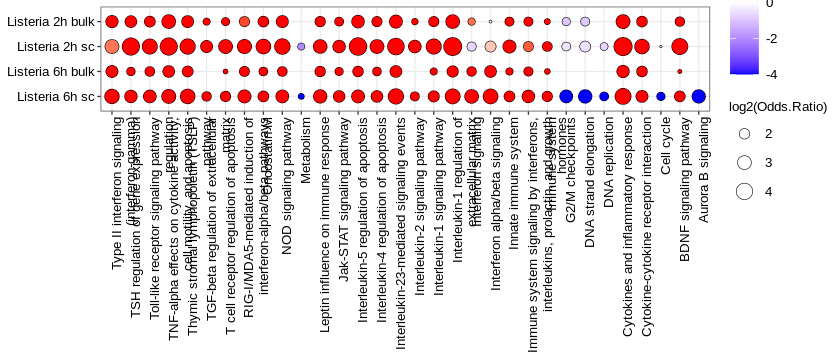

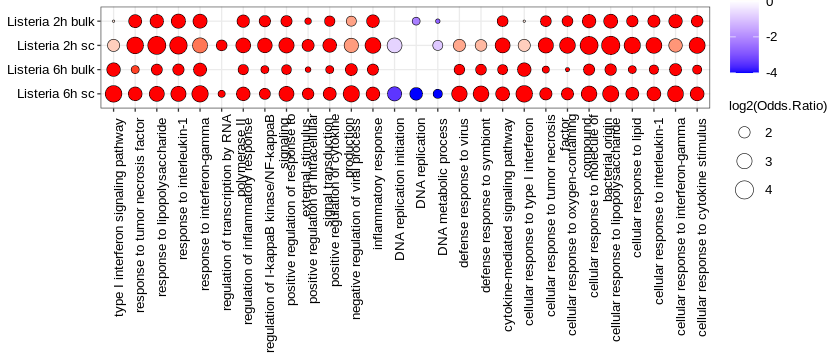

In [13]:
for (db in dbs){
    # load & aggregate enrichment TERMS from bulk & sc
    enrich_terms <- c()

    for (cond in c('LO28_6h','LO28_2h')){
        for (direction in c('up','down')){
            tmp_sc_enr <- read.delim(file=file.path(data_path, 
                                                            "enrichment_analysis", 
                                                            "DEA_KO",
                                                            paste0(KO_gene,'_',cond,'_untreated_',direction),
                                                            db,
                                                            paste0('Enrichr_',db,'_',KO_gene,'_',cond,'_untreated_',direction,'.csv')
                                                           ), 
                                             sep=',', header = TRUE)

            tmp_bulk_enr <- read.delim(file=file.path('results',
                                                              'RNA',
                                                             "enrichment_analysis", 
                                                             "DEA",
                                                             paste0(cond,'_',direction),
                                                             db,
                                                             paste0('Enrichr_',db,'_',cond,'_',direction,'.csv')
                                                            ), 
                                              sep=',', header = TRUE)

            # keep top_n Terms
            tmp_sc_terms <- tmp_sc_enr[order(tmp_sc_enr$Adjusted.P.value),'Term'][1:top_n]
            tmp_bulk_terms <- tmp_bulk_enr[order(tmp_bulk_enr$Adjusted.P.value),'Term'][1:top_n]

            # keep only intersections per comparison and direction
            if(length(enrich_terms)==0){
                enrich_terms <- intersect(tmp_sc_terms,tmp_bulk_terms)
            }else{
                enrich_terms <- c(enrich_terms, intersect(tmp_sc_terms,tmp_bulk_terms))
            }
        }
    }

    # load and aggregate enrichment results for aggregated TERMS
    listeria_enrich <- data.frame()

    for (cond in c('LO28_6h','LO28_2h')){
        for (direction in c('up','down')){
            tmp_sc_enr <- read.delim(file=file.path(data_path, 
                                                            "enrichment_analysis", 
                                                            "DEA_KO",
                                                            paste0(KO_gene,'_',cond,'_untreated_',direction),
                                                            db,
                                                            paste0('Enrichr_',db,'_',KO_gene,'_',cond,'_untreated_',direction,'.csv')
                                                           ), 
                                             sep=',', header = TRUE)

            tmp_bulk_enr <- read.delim(file=file.path('results',
                                                              'RNA',
                                                             "enrichment_analysis", 
                                                             "DEA",
                                                             paste0(cond,'_',direction),
                                                             db,
                                                             paste0('Enrichr_',db,'_',cond,'_',direction,'.csv')
                                                            ), 
                                              sep=',', header = TRUE)

            # remove unnecessary columns
            tmp_sc_enr[,c('X','Gene_set','Overlap','P.value','Genes')] <- NULL
            tmp_bulk_enr[,c('X','Gene_set','Overlap','P.value','Genes')] <- NULL

            # add annotation data
            tmp_sc_enr$direction <- direction
            tmp_sc_enr$condition <- cond
            tmp_sc_enr$assay <- 'sc'

            tmp_bulk_enr$direction <- direction
            tmp_bulk_enr$condition <- cond
            tmp_bulk_enr$assay <- 'bulk'

            # keep intersecting terms
            tmp_sc_enr <- tmp_sc_enr[tmp_sc_enr$Term %in% enrich_terms,]
            tmp_bulk_enr <- tmp_bulk_enr[tmp_bulk_enr$Term %in% enrich_terms,]

            if(nrow(listeria_enrich)==0){
                listeria_enrich <- rbind(tmp_sc_enr, tmp_bulk_enr)
            }else{
                listeria_enrich <- rbind(listeria_enrich, rbind(tmp_sc_enr, tmp_bulk_enr))
            }
        }
    }

    listeria_enrich$group <- paste0(listeria_enrich$condition,'_',listeria_enrich$assay)

    # prepare data for plotting

    # order entries by adjusted p-value
    listeria_enrich <- listeria_enrich[order(listeria_enrich$Adjusted.P.value),]

    # remove stat. weaker duplicates within same comparison (ie group)
    listeria_enrich <- listeria_enrich[!duplicated(listeria_enrich[,c('Term','group')]),]

    # calculate & cap -log10(pvalue)
    listeria_enrich$Adjusted.P.value <- -log10(listeria_enrich$Adjusted.P.value)
    listeria_enrich$Adjusted.P.value[listeria_enrich$Adjusted.P.value>4] <- 4

    # change sign of downregulated p-values
    listeria_enrich <- as.data.table(listeria_enrich)
    listeria_enrich[, Adjusted.P.value:=ifelse(direction=='up', Adjusted.P.value, -Adjusted.P.value)]
    
    # select only positive enrichments
    listeria_enrich[log2(listeria_enrich$Odds.Ratio)<=1, 'Odds.Ratio'] <- NA

    # set order of labels
    # y_axis_labels <- c('mNon-targeting_LO28_6h_untreated', 'mSpi1_LO28_6h_untreated', 'untreated_mSpi1', 'LO28_6h_mSpi1')

    listeria_enrich$Term <- remove_term_suffix(db=db, terms=listeria_enrich$Term)

    print(length(unique(listeria_enrich$Term)))

    height <- 3
    width <- length(unique(listeria_enrich$Term)) * 0.25# 10
    options(repr.plot.width=width, repr.plot.height=height)

    listeria_enr_p <- ggplot(listeria_enrich, aes(x=Term, y=group, fill=Adjusted.P.value, size=log2(Odds.Ratio)))+ 
    geom_point(shape=21, stroke=0.25) +
            # scale_colour_gradient2(low = "blue", mid = "white", high = "red",midpoint = 0)+
            scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0)+
    scale_x_discrete(label=addline_format, limits = rev) + 
    scale_y_discrete(label=treatment_format, limits = rev) + 
    scale_size_continuous(range = c(0.5,5)) +
    macro_theme() + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust=1), # 45 angle
          axis.title.x=element_blank(),
          axis.title.y=element_blank())

    print(listeria_enr_p)

    # save plot
    ggsave_new(filename=paste0("DEA_enrichment_comparison_",db,"_top",top_n),
               results_path=results_path,
               plot=listeria_enr_p,
               width=width,
               height=height
              )
}

## Dotplot protein expression

## for NT using all data

In [41]:
DefaultAssay(object = KO15) <- "AB"
tmp_AB_data <- GetAssayData(object = KO15,assay = "AB", slot = "data")

In [42]:
Idents(object = KO15) <- "KO_call"
levels(KO15)

[1] "mStat1"         "mIrf8"          "mKdm1b"         "mNon-targeting"
 [5] "mHdac6"         "mIrf9"          "mTyk2"          "mcJun"         
 [9] "mStat2"         "mEp300"         "mKdm6b"         "mCsf1r"        
[13] "mRela"          "mSpi1"          "mCreb1"         "mJak1"

In [43]:
# reorder condition levels
KO15$condition <- factor(KO15$condition, 
                            levels=c("untreated", 
                                     "LO28_2h",
                                     'LO28_6h'))

In [44]:
width <- 4
height <- 4
options(repr.plot.width=width, repr.plot.height=height)

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



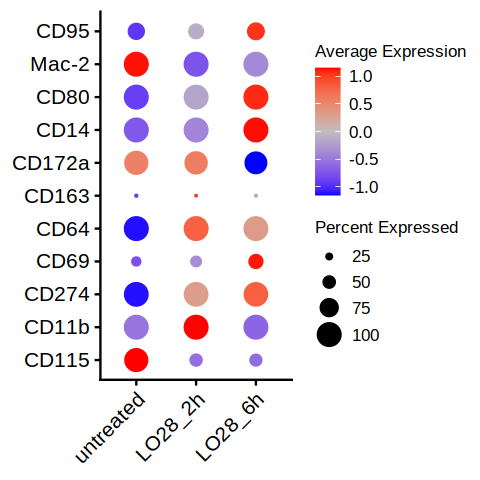

In [59]:
AB_DP_p <- DotPlot(KO15,
        assay = "AB",
        features=rownames(tmp_AB_data),
#         cols = c("white", "red"),
        col.min = -2.5,
        col.max = 2.5,
        dot.min = 0,
        dot.scale = 6,
        idents='mNon-targeting', 
        group.by="condition", 
      split.by = NULL,
      cluster.idents = FALSE,
      scale = T,#TRUE,
      scale.by = "radius",
      scale.min = NA,
      scale.max = NA
       )+ 
theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1),
     legend.text=element_text(size=10),
     legend.title=element_text(size=10),
     axis.title.x = element_blank(),
     axis.title.y = element_blank()) +
scale_colour_gradient2(low = "blue", mid = "grey", high = "red",midpoint = 0) +
coord_flip()

AB_DP_p

In [60]:
# save plot
ggsave_new(filename="Dotplot_listeria_treatment_AB",
           results_path=results_path,
           plot=AB_DP_p,
           width=width,
           height=height
          )

In [44]:
# # save protein dot plot without legend
# width <- 2
# height <- 4

# ggsave_new(filename="Dotplot_listeria_treatment_AB_woLegend",
#            results_path=results_path,
#            plot=AB_DP_p+NoLegend(),
#            width=width,
#            height=height
#           )

## for EP300 using condition-wise mixscape selected data

In [16]:
# load unsupervised analysis data of condition-wise mixscape
KO15_mixscape_all <- readRDS(file = file.path(data_path,"unsupervised_mixscape","KO15_normalized_Seurat.rds"))
KO15_mixscape_all

An object of class Seurat 
44530 features across 4978 samples within 5 assays 
Active assay: SCT (13395 features, 3000 variable features)
 4 other assays present: RNA, AB, gRNA, HTO
 2 dimensional reductions calculated: pca, umap

In [17]:
DefaultAssay(object = KO15_mixscape_all) <- "AB"
tmp_AB_data <- GetAssayData(object = KO15_mixscape_all,assay = "AB", slot = "data")

In [18]:
Idents(object = KO15_mixscape_all) <- "KO_call"
levels(KO15_mixscape_all)

[1] "mStat1"         "mIrf9"          "mNon-targeting" "mStat2"        
 [5] "mRela"          "mTyk2"          "mSpi1"          "mEp300"        
 [9] "mJak1"          "mIrf8"

In [19]:
# reorder condition levels
KO15_mixscape_all$condition <- factor(KO15_mixscape_all$condition, 
                            levels=c("untreated", 
                                     "LO28_2h",
                                     'LO28_6h'))

In [20]:
width <- 4
height <- 4
options(repr.plot.width=width, repr.plot.height=height)

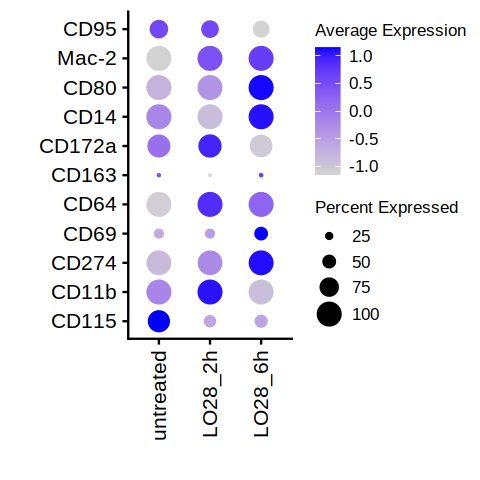

In [21]:
# for Ep300
AB_DP_p <- DotPlot(KO15_mixscape_all,
        assay = "AB",
        features=rownames(tmp_AB_data),
#         cols = c("white", "red"),
        col.min = -2.5,
        col.max = 2.5,
        dot.min = 0,
        dot.scale = 6,
        idents='mEp300', 
        group.by="condition", 
      split.by = NULL,
      cluster.idents = FALSE,
      scale = T,#TRUE,
      scale.by = "radius",
      scale.min = NA,
      scale.max = NA
       )+ 
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),
     legend.text=element_text(size=10),
     legend.title=element_text(size=10)) +
xlab("")+
ylab("")+
coord_flip()

AB_DP_p   #+ scale_colour_gradient2(low = "blue", mid = "white", high = "red",midpoint = 0)

In [22]:
# save plot
ggsave_new(filename="Dotplot_Ep300_AB",
           results_path=results_path,
           plot=AB_DP_p,
           width=width,
           height=height
          )

# Visualize Cell Cycle phase assignemnt in KO groups for each condition

In [11]:
bar_data <- data.frame(table(KO15[[c('Phase','KO_call','condition')]]))
head(bar_data)

,Phase,KO_call,condition,Freq
,<fct>,<fct>,<fct>,<int>
1,G1,mcJun,LO28_2h,28
2,G2M,mcJun,LO28_2h,40
3,S,mcJun,LO28_2h,36
4,G1,mCreb1,LO28_2h,51
5,G2M,mCreb1,LO28_2h,70
6,S,mCreb1,LO28_2h,58


In [12]:
cc_p <- list()

for (cond in c('untreated', 'LO28_2h', 'LO28_6h')){
    
    cc_p[[cond]] <- ggplot(bar_data[bar_data$condition==cond,], aes(fill=Phase, y=Freq, x=KO_call)) + 
        geom_bar(position="fill", stat="identity") +
        scale_y_continuous(expand = expansion(mult = c(0, 0))) +
        ggtitle(cond)+
    macro_theme() + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust=1),
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(), 
          panel.background = element_blank(), 
          axis.line = element_line(colour = "black"),
          axis.title.x=element_blank(),
          axis.title.y=element_blank())
}

In [13]:
width <- 10
height <- 4
options(repr.plot.width=width, repr.plot.height=height)

In [14]:
# save plot
ggsave_new(filename=paste0("CellCycle_Phase_panel"),
           results_path=results_path,
           plot=wrap_plots(cc_p, guides='collect'),
           width=width,
           height=height
          )

# Mixscape result statistics per condition as barplots

In [10]:
KO_col_mixscape <- KO_col
names(KO_col_mixscape) <- sub('.', '', names(KO_col_mixscape))
names(KO_col_mixscape) <- sub('Non-targeting', 'NT', names(KO_col_mixscape))
KO_col_mixscape

Stat1      Irf8     Kdm1b        NT     Hdac6      Irf9      Tyk2      cJun 
"#F8766D" "#E68613" "#CD9600" "#D3D3D3" "#7CAE00" "#0CB702" "#00BE67" "#00C19A" 
    Stat2     Ep300     Kdm6b     Csf1r      Rela      Spi1     Creb1      Jak1 
"#00BFC4" "#00B8E7" "#00A9FF" "#8494FF" "#C77CFF" "#ED68ED" "#FF61CC" "#FF68A1"

In [11]:
# load mixscape data
KO15_mixscape_data <- list()
for (cond in unique(KO15$condition)){
    KO15_mixscape_data[[cond]] <- readRDS(file = file.path(data_path,'mixscape',cond,paste0("KO15_mixscape_Seurat.rds")))
}

In [44]:
# configs
grna_split_symbol <- '_'
NT_term <- "mNon-targeting"

stats_p <- list()

for (cond in c('untreated', 'LO28_2h', 'LO28_6h')){
    data <- KO15_mixscape_data[[cond]]
    


    # Calculate percentage of KO cells for all target gene classes.
    stat_table <- table(data$mixscape_class.global, unlist(data[["guide_call"]]))
    df <- prop.table(stat_table,2)

    df2 <- reshape2::melt(df)
    df2$Var2 <- as.character(df2$Var2)
    test <- df2[which(df2$Var1 == "KO"),]
    test <- test[order(test$value, decreasing = T),]
    new.levels <- test$Var2
    df2$Var2 <- factor(df2$Var2, levels = new.levels )
    df2$Var1 <- factor(df2$Var1, levels = c(NT_term, "NP", "KO"))
    df2$gene <- sapply(as.character(df2$Var2), function(x) head(strsplit(x, split = grna_split_symbol)[[1]],1))
    df2$guide_number <- sapply(as.character(df2$Var2), function(x) tail(strsplit(x, split = grna_split_symbol)[[1]],1)) 
    # remove NT
    df3 <- df2[-c(which(df2$gene == NT_term)),]
    df3$Var1 <- factor(df3$Var1, levels = c("NP", "KO"))
    df3 <- df3[!is.na(df3$Var1),]
                               
    # beautify gene names
    df3$gene <- gsub('^.', '', df3$gene)
    df3$gene[df3$gene == 'cJun'] <- 'Jun' # added

    p1 <- ggplot(df3, aes(x = guide_number, y = value*100, fill= Var1)) +
      geom_bar(stat= "identity") +
      theme_classic()+
      scale_fill_manual(values = c("grey79","coral1")) + 
      ylab("% of cells") +
      xlab("gRNA")

    stats_p[[cond]] <- p1 + theme(axis.text.x = element_text(size = 6, hjust = 1), # 10
               axis.text.y = element_text(size = 6), # 10
               axis.title = element_text(size = 6),  # 8,
               axis.line = element_line(colour = NA), # new # axis.line = element_blank()
               panel.border = element_rect(colour = "black", fill=NA, size=01), # new
               strip.text = element_text(size= 6)) +  # 12 , face = "bold"
      facet_wrap(vars(gene),ncol = 8, scales = "free") + 
      labs(fill = "Mixscape classification") + theme(legend.title = element_text(size =6), # 12
              legend.text = element_text(size = 6)) + ggtitle(treatment_format(cond)) # 12
}

In [45]:
width <- 8 # 11
height <- 1.5 *ceiling((dim(unique(data[["KO_call"]]))[1]-1)/10) * 2.25 # 2.25 was 3
options(repr.plot.width=width, repr.plot.height=height)

# wrap_plots(stats_p, guides='collect', ncol=1)

In [46]:
ggsave_new(filename = "Mixscape_statistics_panel", 
           results_path=results_path, 
           plot=wrap_plots(stats_p, guides='collect', ncol=1), 
           width=width, 
           height=height)

# Clustermap of DEA AB avgLFCs per condition (DEPs x DEA)

In [18]:
library(tidyr)


Attaching package: ‘tidyr’


The following object is masked from ‘package:reshape2’:

    smiths




In [10]:
stat_sign <- 0.05
width <- 5
height <- 5

In [12]:
sum(KO15$cond_KO==paste(cond,KO_gene,sep='+'))

[1] 191

In [16]:
# aggregate all DEA AB results
dea_ab_results <- data.frame()
for (cond in unique(KO15$condition)){
    for (KO_gene in unique(KO15$KO_call)){
        
        tmp_path <- file.path(data_path, "DEA_condition_mixscape",paste0('KO15_DEA_AB_',cond,'_',KO_gene,'.csv'))
        
        if ((KO_gene=="mNon-targeting")  | !file.exists(tmp_path)) {
            next
        }
        
        tmp_dea_res <- read.csv(file=tmp_path, row.names=1)
        if (dim(tmp_dea_res)[1]==0){
            next
        }
        tmp_dea_res$ab <- rownames(tmp_dea_res)
        rownames(tmp_dea_res) <- NULL
        tmp_dea_res$group <- paste0(cond,'_',KO_gene)
        
        if(dim(dea_ab_results)[1]==0){
            dea_ab_results <- tmp_dea_res
        }else{
            dea_ab_results <- rbind(dea_ab_results, tmp_dea_res)
        }
    }
}

dim(dea_ab_results)
head(dea_ab_results)

[1] 103   7

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,ab,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,1.547594e-07,0.3901897,1.000,0.99,1.702353e-06,CD274,LO28_2h_mStat1
2,2.937996e-03,0.1577126,1.000,1.00,3.231796e-02,CD64,LO28_2h_mStat1
3,2.937996e-03,0.1959834,1.000,1.00,3.231796e-02,CD14,LO28_2h_mStat1
4,1.456659e-08,-0.2550945,1.000,1.00,1.602325e-07,CD64,LO28_2h_mIrf9
5,5.684699e-03,0.1828451,1.000,1.00,6.253169e-02,CD14,LO28_2h_mIrf9
6,1.092722e-06,-0.1826123,0.971,0.99,1.201994e-05,CD274,LO28_2h_mTyk2


In [19]:
# make adjp dataframe for visualization of significance with *
dea_ab_results_adjp <- pivot_wider(dea_ab_results,id_cols='group', names_from='ab',  values_from = "p_val_adj", values_fill = 1)
dea_ab_results_adjp <- data.frame(dea_ab_results_adjp, row.names=dea_ab_results_adjp$group)
dea_ab_results_adjp$group <- NULL
mask <- dea_ab_results_adjp<stat_sign
dea_ab_results_adjp[mask] <- '*'
dea_ab_results_adjp[!mask] <- ' '
# dim(dea_ab_results_adjp)
# head(dea_ab_results_adjp)

In [20]:
# make LFC dataframe for visualization of effect size
dea_ab_results_lfc <- pivot_wider(dea_ab_results,id_cols='group', names_from='ab',  values_from = "avg_log2FC", values_fill = 0)
dea_ab_results_lfc <- data.frame(dea_ab_results_lfc, row.names=dea_ab_results_lfc$group)
dea_ab_results_lfc$group <- NULL
# dim(dea_ab_results_lfc)
# head(dea_ab_results_lfc)

In [42]:
cond <- 'all'

tmp_lfc <- dea_ab_results_lfc
tmp_adjp <- dea_ab_results_adjp

In [43]:
head(tmp_lfc)

,CD274,CD64,CD14,CD11b,Mac.2,CD80,CD115,CD69
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LO28_2h_mStat1,0.3901897,0.1577126,0.1959834,0.0000000,0.0000000,0,0,0
LO28_2h_mIrf9,0.0000000,-0.2550945,0.1828451,0.0000000,0.0000000,0,0,0
LO28_2h_mTyk2,-0.1826123,-0.1472618,0.2751796,0.1964982,0.1631849,0,0,0
LO28_2h_mStat2,0.1193498,-0.3245430,0.1213869,0.0000000,0.1267979,0,0,0
LO28_2h_mEp300,0.1552432,-0.2161251,0.0000000,-0.2615528,0.1134372,0,0,0
LO28_2h_mRela,-0.1790953,0.0000000,0.2757731,0.1226876,0.1104872,0,0,0


In [47]:
treatment_format(rownames(tmp_lfc))

[1] "Listeria 2h mStat1" "Listeria 2h mIrf9"  "Listeria 2h mTyk2" 
 [4] "Listeria 2h mStat2" "Listeria 2h mEp300" "Listeria 2h mRela" 
 [7] "Listeria 2h mSpi1"  "Listeria 2h mJak1"  "Untreated mStat1"  
[10] "Untreated mIrf9"    "Untreated mTyk2"    "Untreated mStat2"  
[13] "Untreated mEp300"   "Untreated mSpi1"    "Untreated mJak1"   
[16] "Listeria 6h mStat1" "Listeria 6h mIrf8"  "Listeria 6h mIrf9" 
[19] "Listeria 6h mTyk2"  "Listeria 6h mStat2" "Listeria 6h mEp300"
[22] "Listeria 6h mRela"  "Listeria 6h mSpi1"  "Listeria 6h mJak1"

In [61]:
# prepare annotation DFs for heatmap
#rows
annotation_row <- t(data.frame(strsplit(rownames(tmp_lfc),split='_m',fixed=T)))
rownames(annotation_row) <- rownames(tmp_lfc)
colnames(annotation_row) <- c('Condition','KO')
annotation_row <- as.data.frame(annotation_row)
annotation_row$Condition <- treatment_format(annotation_row$Condition)
dim(annotation_row)
head(annotation_row)
# colors
cond_col_new <- cond_colors
names(cond_col_new) <- treatment_format(names(cond_col_new))
KO_col_new <- KO_col
names(KO_col_new) <- gsub("^.", "", names(KO_col_new))
annotation_colors <- list(KO=KO_col_new[unique(annotation_row$KO)], Condition=cond_col_new[unique(annotation_row$Condition)])
annotation_colors

[1] 24  2

,Condition,KO
,<chr>,<chr>
LO28_2h_mStat1,Listeria 2h,Stat1
LO28_2h_mIrf9,Listeria 2h,Irf9
LO28_2h_mTyk2,Listeria 2h,Tyk2
LO28_2h_mStat2,Listeria 2h,Stat2
LO28_2h_mEp300,Listeria 2h,Ep300
LO28_2h_mRela,Listeria 2h,Rela


$KO
    Stat1      Irf9      Tyk2     Stat2     Ep300      Rela      Spi1      Jak1 
"#F8766D" "#0CB702" "#00BE67" "#00BFC4" "#00B8E7" "#C77CFF" "#ED68ED" "#FF68A1" 
     Irf8 
"#E68613" 

$Condition
Listeria 2h   Untreated Listeria 6h 
  "#619CFF"   "#00BA38"   "#F8766D"

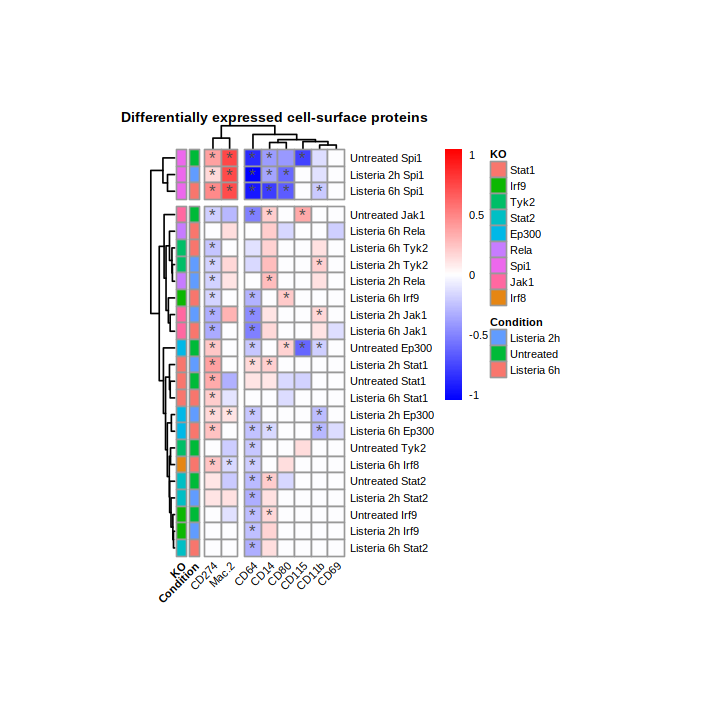

In [69]:


width <- 6
height <- 6
options(repr.plot.width=width, repr.plot.height=height)

# plot and save heatmap
tmp_plot <- as.ggplot(pheatmap(tmp_lfc,
         display_numbers=as.matrix(tmp_adjp),
                               main = "Differentially expressed cell-surface proteins",
         angle_col = "45",
         breaks=seq(-max(abs(dea_ab_results_lfc)), max(abs(dea_ab_results_lfc)), length.out=200),
         color=colorRampPalette(c("blue", "white", "red"))(200),
                               annotation_row = annotation_row,
                            annotation_colors = annotation_colors,
            show_rownames=T,
         show_colnames=T, 
         labels_row = treatment_format(gsub("_m"," ",rownames(tmp_lfc))),
         cutree_rows = 2, # split row clusters
         cutree_cols = 2, # split col clusters 
         treeheight_row = 10,
         treeheight_col = 10,
         cellwidth = 10,
         cellheight = 10,
         fontsize = 6,
                               fontsize_number = 10,
         height=height,
         width=width
                     ))

In [70]:
ggsave_new(filename = paste0("KO15_",'clustermap',"_DEA_AB_LFC_",cond), 
           results_path=results_path, 
           plot=tmp_plot, 
           width=width, 
           height=height)